July 20 –  Statistical Analysis & Spatial Characteristics
================================
* Mean, standard deviation, median, mode
* Error bar plots
* Histograms

CWK: Compute the mean, median, mode and standard deviation for each city for temperature and precipitation. Plot the temperature and precipitation plots with error bars and the the histograms for both variables for all 4 cities. Submit these graphs and a paragraph discussing whether the mean, median, and standard deviation are accurate representations of the variability in the data given the histogram.

In [16]:
#lets start with yesterday's data, aggregated into city averages:

import pandas as pd
import numpy as np

data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\GHCN_2005_2015.csv"
df = pd.read_csv(data_path)

nyc_inds = [sn.endswith("NY US") for sn in df['STATION_NAME']]
nyc = df[nyc_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    nyc[dk][nyc[dk]==-9999]= np.nan

nyc_agg = nyc.groupby('DATE').mean()

In [18]:
nyc_agg.mean()

EMXP    371.085462
MXSD     38.807329
TPCP    977.874515
TSNW     48.616361
EMXT    256.411553
EMNT     19.103064
MMXT    171.407098
MMNT     86.101308
MNTM    128.775570
dtype: float64

In [46]:
print nyc_agg.index[0]/10000
print nyc_agg.index[0]%10000

2005
601


In [48]:
nyc_month=nyc_agg.groupby(nyc_agg.index%10000)

In [49]:
list(nyc_month)

[(101,                 EMXP        MXSD         TPCP        TSNW        EMXT  \
  DATE                                                                    
  20060101  332.500000   43.100000  1255.083333   49.900000  168.583333   
  20070101  386.083333   10.000000   886.583333   39.400000  216.750000   
  20080101  225.357143    2.333333   539.285714    3.500000  178.818182   
  20090101  316.466667   80.307692   766.733333  192.230769   75.090909   
  20100101  305.800000   11.400000   452.933333   33.538462  123.545455   
  20110101  290.916667  474.900000   953.166667  715.181818  109.400000   
  20120101  251.250000   82.111111   706.500000   82.600000  163.500000   
  20130101  215.384615   27.750000   636.769231   31.636364  148.285714   
  20140101  295.214286  212.900000   763.285714  338.333333  132.166667   
  
                  EMNT       MMXT       MMNT       MNTM  
  DATE                                                   
  20060101  -96.500000  81.166667  -0.250000  40.33

(100, 1201)

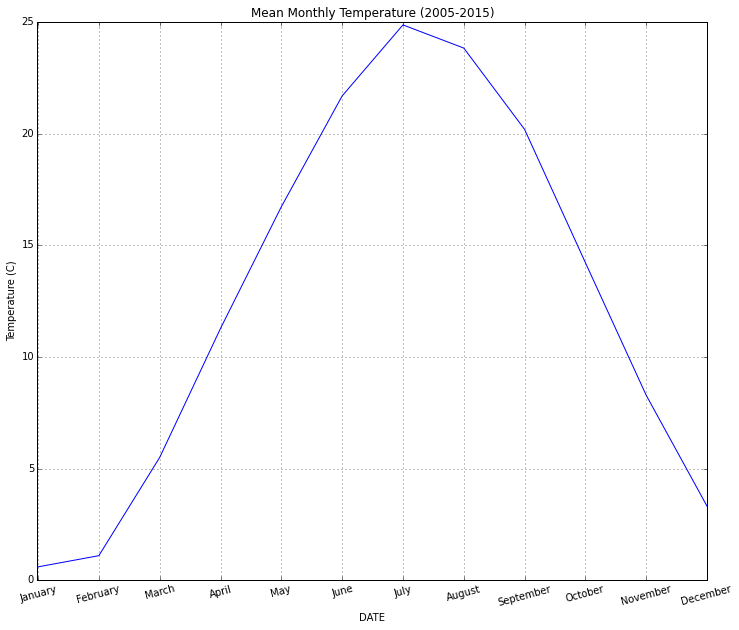

In [66]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,1,1)
ax.set_title("Mean Monthly Temperature (2005-2015)")
(nyc_month['MNTM'].mean()/10).plot(ax=ax)
ax.set_ylabel("Temperature (C)")
ax.set_xticks(range(101,1301,100))
import calendar
ax.set_xticklabels(calendar.month_name[1:], rotation=15)
ax.set_xlim((100,1201))

In [55]:
nyc_month.mean()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
DATE,,,,,,,,,
101,290.996968,104.978015,773.371184,165.146750,146.237807,-124.669048,43.076768,-31.295250,5.946188
201,295.570113,207.472278,763.612933,263.159475,144.483754,-100.573473,50.543362,-28.499952,10.965284
301,368.974359,64.352076,930.184253,51.037072,211.596633,-67.156818,99.513636,10.439646,54.983754
401,481.644309,0.000000,1055.283711,0.964815,278.613797,3.469978,162.568943,62.722182,112.763548
501,359.985087,0.000000,990.856904,0.000000,307.980852,57.479401,215.886768,118.657892,167.273902
601,411.829351,0.000000,1196.367582,0.000000,333.284848,109.761591,263.244015,170.504773,216.935985
701,344.970322,0.000000,949.041771,0.000000,353.067944,155.290195,293.766061,203.697641,248.754848
801,456.705626,0.000000,1070.707583,0.000000,337.114957,144.844747,282.367150,194.344062,238.380996
901,350.801321,0.000000,842.116728,0.000000,314.293817,93.603997,245.849257,158.153442,201.951724


In [67]:
nyc_month.std()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
DATE,,,,,,,,,
101,53.915654,153.186000,239.255107,231.961520,41.783362,23.635546,25.540848,23.715146,24.329504
201,134.101030,146.991492,416.535668,237.182016,40.765270,17.851049,20.181373,16.151637,17.285470
301,208.672498,62.268829,634.582008,60.701626,41.344830,36.920608,23.148088,21.691979,22.022695
401,273.947196,0.000000,591.160739,1.918847,28.832589,18.632093,14.604277,9.603575,11.739503
501,175.967017,0.000000,305.699082,0.000000,21.154494,16.016192,11.916892,11.375805,10.272545
601,186.309657,0.000000,529.094817,0.000000,22.266467,13.547611,13.844941,8.090436,10.596825
701,104.791395,0.000000,309.714134,0.000000,26.568115,13.163296,14.718395,12.706114,13.249061
801,319.195361,0.000000,780.103997,0.000000,20.379965,15.065634,8.877370,11.299565,9.784699
901,192.544917,0.000000,514.974462,0.000000,18.857513,9.607157,12.199762,11.178249,10.757239


(100, 1201)

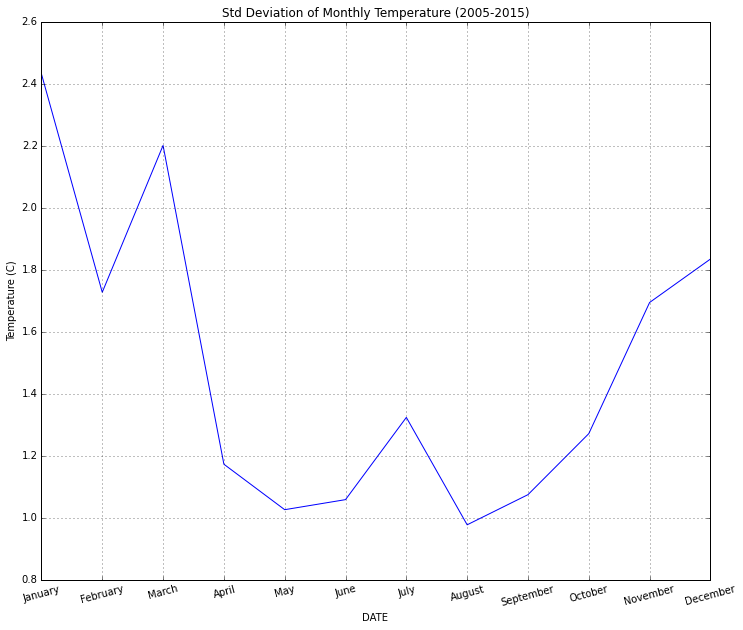

In [70]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,1,1)
ax.set_title("Std Deviation of Monthly Temperature (2005-2015)")
(nyc_month['MNTM'].std()/10).plot(ax=ax)
ax.set_ylabel("Temperature (C)")
ax.set_xticks(range(101,1301,100))
import calendar
ax.set_xticklabels(calendar.month_name[1:], rotation=15)
ax.set_xlim((100,1201))

(90, 1210)

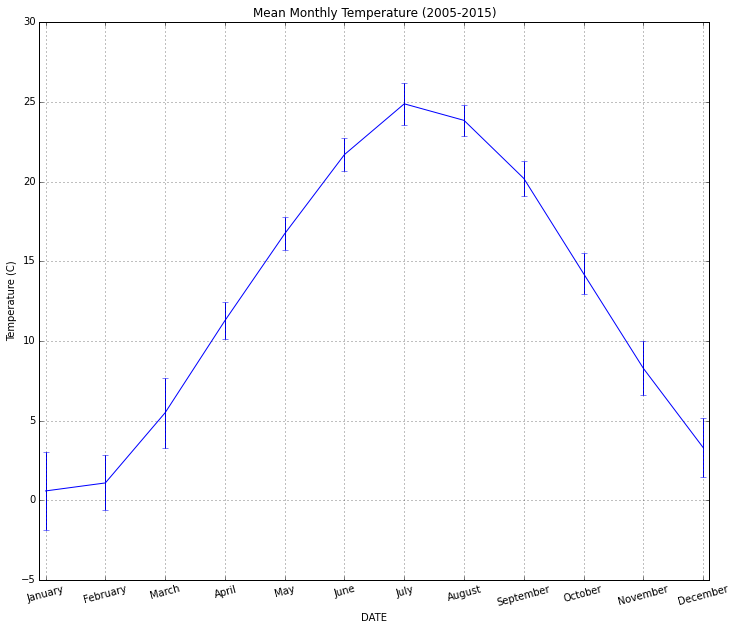

In [73]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,1,1)
ax.set_title("Mean Monthly Temperature (2005-2015)")
(nyc_month['MNTM'].mean()/10).plot(yerr=nyc_month['MNTM'].std()/10,
                                   ax=ax)
ax.set_ylabel("Temperature (C)")
ax.set_xticks(range(101,1301,100))
import calendar
ax.set_xticklabels(calendar.month_name[1:], rotation=15)
ax.set_xlim((90,1210))

In [77]:
def c2f(c):
    return (9.0/5)*c+32

(90, 1210)

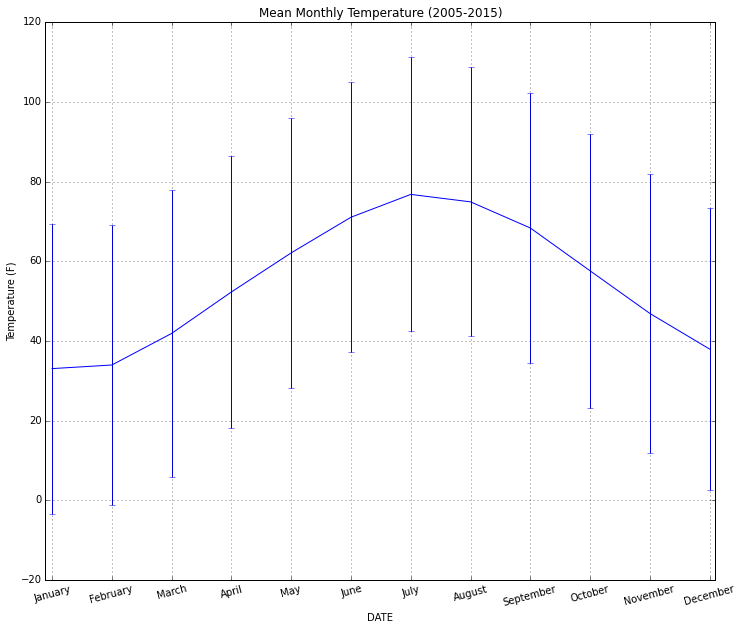

In [78]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(1,1,1)
ax.set_title("Mean Monthly Temperature (2005-2015)")
c2f((nyc_month['MNTM'].mean()/10)).plot(yerr=c2f(nyc_month['MNTM'].std()/10),
                                   ax=ax)
ax.set_ylabel("Temperature (F)")
ax.set_xticks(range(101,1301,100))
import calendar
ax.set_xticklabels(calendar.month_name[1:], rotation=15)
ax.set_xlim((90,1210))

In [79]:
nyc_month.min()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
DATE,,,,,,,,,
101,215.384615,2.333333,452.933333,3.5,75.090909,-164.166667,8.818182,-67.833333,-25.545455
201,118.090909,1.777778,260.333333,9.0,80.500000,-125.250000,16.166667,-58.250000,-21.083333
301,92.153846,0.000000,255.583333,0.0,144.166667,-116.000000,66.500000,-25.000000,20.833333
401,175.090909,0.000000,385.636364,0.0,225.166667,-19.636364,140.333333,48.166667,95.500000
501,173.545455,0.000000,446.818182,0.0,269.545455,29.727273,198.727273,97.818182,148.272727
601,210.142857,0.000000,487.571429,0.0,288.181818,80.454545,233.363636,153.727273,193.636364
701,253.071429,0.000000,572.900000,0.0,313.181818,132.272727,269.909091,180.272727,225.181818
801,194.200000,0.000000,392.000000,0.0,313.727273,116.700000,270.714286,173.363636,223.636364
901,113.571429,0.000000,336.642857,0.0,283.166667,77.666667,230.272727,140.333333,186.727273


In [80]:
nyc_month.max()

,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
DATE,,,,,,,,,
101,386.083333,474.900000,1255.083333,715.181818,216.750000,-96.500000,81.166667,-0.250000,40.333333
201,473.461538,375.333333,1397.153846,694.818182,193.363636,-67.750000,81.000000,3.250000,42.125000
301,645.533333,173.461538,2282.266667,141.153846,250.083333,-22.000000,143.000000,46.875000,94.875000
401,1097.250000,0.000000,2411.500000,4.600000,319.222222,38.888889,187.888889,79.444444,133.777778
501,769.400000,0.000000,1388.800000,0.000000,338.900000,79.125000,235.800000,137.875000,180.400000
601,844.266667,0.000000,1968.642857,0.000000,359.272727,128.727273,285.100000,181.400000,233.300000
701,588.090909,0.000000,1480.545455,0.000000,392.700000,169.142857,319.100000,223.000000,268.200000
801,1306.933333,0.000000,3188.933333,0.000000,374.500000,165.666667,298.083333,211.583333,255.000000
901,769.461538,0.000000,1711.083333,0.000000,342.300000,108.400000,271.500000,173.333333,220.416667


(90, 1210)

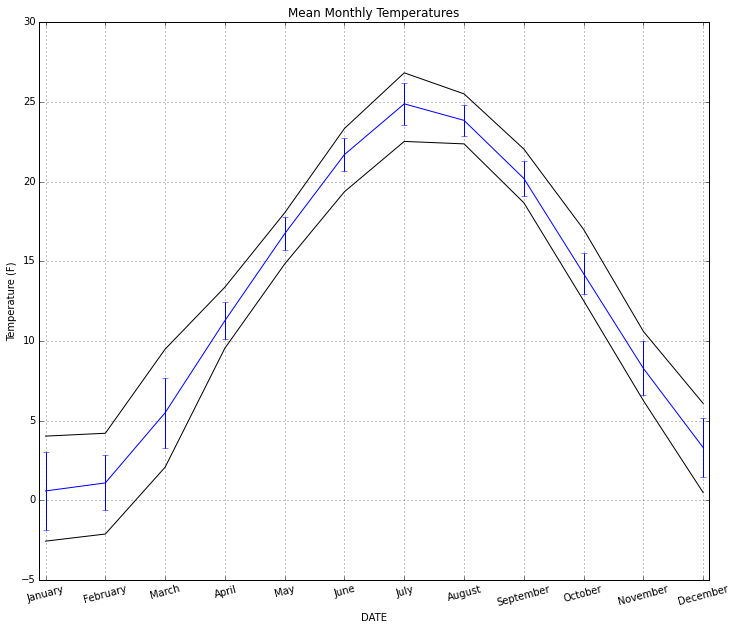

In [86]:
fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.set_title("Mean Monthly Temperatures")
(nyc_month['MNTM'].mean()/10).plot(yerr=nyc_month['MNTM'].std()/10,
                                   ax=ax)
(nyc_month['MNTM'].min()/10).plot(ax=ax, color='k')
(nyc_month['MNTM'].max()/10).plot(ax=ax, color='k')

ax.set_ylabel("Temperature (F)")
ax.set_xticks(range(101,1301,100))
import calendar
ax.set_xticklabels(calendar.month_name[1:], rotation=15)
ax.set_xlim((90,1210))

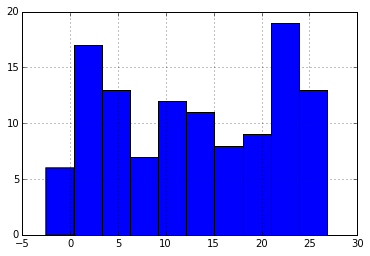

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
(nyc_agg['MNTM']/10).hist(ax=ax)
ax.set_xlabel("Temperature (C)")
ax.set_ylabel("")